In [35]:
import pandas as pd 
import matplotlib.pyplot as  plt
import numpy as np

# Read datafile with 20 descriptors and label is the last column.
df = pd.read_csv("foo.csv") 

In [4]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,82.754400,72.339900,-38.930100,-29.09115,-111.52540,9.83847,81.715200,-8.07879,-0.744150,116.61690,...,39.934080,-26.54785,-130.466700,28.7125,152.88160,50.26260,-9.746760,20.64848,27.61830,0.0
1,-7.748754,13.648140,45.589500,-112.79250,-56.23186,63.45855,-40.922240,15.17708,0.056428,-20.10591,...,84.708000,35.72100,57.601180,-35.1175,-121.11900,-87.21000,0.991656,17.44665,19.92600,0.0
2,9.442300,4.903912,38.293200,28.19124,78.42520,11.25672,96.377600,-91.80660,1.020300,63.78360,...,-3.649248,59.30400,60.843510,12.5650,111.11740,18.27724,-4.899240,30.34160,-20.25567,0.0
3,-51.509120,-20.195270,0.610929,-58.29246,-14.65792,-71.01666,-60.376960,-60.50480,1.783100,-49.83456,...,129.765600,-30.21165,159.313700,17.6205,48.78506,170.06520,8.332920,30.19670,19.28745,0.0
4,31.780740,-23.462430,13.328370,143.97750,19.18080,-141.63900,2.613248,24.90258,-1.405200,42.21627,...,-6.846984,15.37480,7.764666,71.6450,10.87204,95.58520,-10.311360,3.10776,4.55301,0.0


In [10]:
# Let's separate Data from labels

X = df.drop(['21'],axis=1).as_matrix()         # Data
y = df['21'].as_matrix().astype(int)           # Labels

print(X.shape)
print(y.shape)

(200, 20)
(200,)


## 1- Impact of normalization in KNN

In [14]:
# Notice that only two last features are good to separate data.
# Let's find the 10-fold cross-validation with all columns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb

cv = StratifiedKFold(n_splits=10, random_state=1) 

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

0.61

In [21]:
# Poor score. What could happen? 
# Remeber that all columns should be in the same range for KNN!!
# Could be that each colum is in a different range?

for i in range(20):
    print('std:',X[:,i].std(),'min',X[:,i].min(),'max',X[:,i].max())

std: 86.16117106793163 min -228.9276 max 252.0926
std: 56.54857424088652 min -151.7558 max 143.5391
std: 32.23282330536131 min -76.2729 max 84.84960000000001
std: 79.70740274730235 min -303.1182 max 218.0034
std: 72.43465317163854 min -195.2416 max 234.3062
std: 96.75379839452157 min -330.1686 max 255.8709
std: 65.47346962666546 min -172.9152 max 157.9712
std: 51.91524190103987 min -197.2766 max 115.0524
std: 1.0491788914224565 min -2.6643 max 3.3255
std: 64.74453748991836 min -205.5165 max 162.6537
std: 51.49849024659317 min -139.44930000000002 max 137.3379
std: 67.04445524317472 min -161.28719999999998 max 200.3472
std: 33.973330877199956 min -107.76499999999999 max 101.8325
std: 92.74305330661575 min -245.4816 max 221.1755
std: 47.48940092361951 min -118.56 max 125.49
std: 95.00825847614374 min -249.1 max 290.4882
std: 72.13770757239998 min -199.8116 max 220.09600000000003
std: 12.207308064839465 min -37.2324 max 39.9672
std: 32.186240545227015 min -76.567 max 89.884
std: 34.2867946

In [22]:
# Let's solve that
from sklearn import preprocessing

# One way is to standarize all data mean 0, std 1
scaler = preprocessing.StandardScaler().fit(X)
X2=scaler.transform(X)

for i in range(20):
    print('std:',X2[:,i].std(),'min',X2[:,i].min(),'max',X2[:,i].max())

std: 1.0 min -2.662210068142548 max 2.9205854537608347
std: 1.0 min -2.752715987089397 max 2.4692529831997216
std: 0.9999999999999999 min -2.390615561348707 max 2.6080933160458586
std: 1.0 min -3.872739770528369 max 2.6651924922016073
std: 1.0 min -2.65427186838908 max 3.2758704211330225
std: 1.0 min -3.3489435912249106 max 2.7080744248572675
std: 0.9999999999999999 min -2.610997897236479 max 2.4427498556585268
std: 1.0 min -3.6850315748248117 max 2.3311014251014393
std: 1.0 min -2.4768950521647692 max 3.232140889150391
std: 1.0 min -3.2321412311051767 max 2.454364754937728
std: 1.0 min -2.6490091754490757 max 2.725657123983083
std: 0.9999999999999998 min -2.4894570248147585 max 2.9044923881281584
std: 1.0 min -3.1456117796126986 max 3.023859820261078
std: 1.0 min -2.5994333949516713 max 2.432286861844224
std: 1.0 min -2.4227503298062416 max 2.7162911247811197
std: 1.0 min -2.633270717753657 max 3.046111355495152
std: 1.0 min -2.816556283495444 max 3.004360600764647
std: 1.0 min -3.033

In [23]:
# Let's repeat the 10-fold Cross-validation with new data X2
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)


0.8299999999999998

## 2- Effect of irrelevant columns

In [42]:
# Let's build a pandas dataframe to work with columns

columns = [str(i+1) for i in range(20)]
df=pd.DataFrame(data=X2, columns=columns)
df['21']=y
df.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.955220,1.210173,-1.232082,-0.434828,-1.498524,0.165203,1.278064,-0.040672,-0.646750,1.743312,...,0.511854,-0.754997,-1.359288,0.678415,1.597747,0.650066,-0.781787,0.644634,0.817056,0
1,-0.095174,0.172273,1.390077,-1.484935,-0.735166,0.719394,-0.595022,0.407286,0.116302,-0.368416,...,1.179679,1.077878,0.668550,-0.665674,-1.286219,-1.255631,0.097884,0.545156,0.592704,0
2,0.104348,0.017641,1.163715,0.283831,1.123848,0.179862,1.502009,-1.653451,1.034994,0.927285,...,-0.138212,1.772040,0.703511,0.338392,1.158162,0.206673,-0.384687,0.945791,-0.579224,0
3,-0.603063,-0.426211,-0.005350,-0.801184,-0.161215,-0.670476,-0.892161,-1.050510,1.762039,-0.827584,...,1.851734,-0.862840,1.765263,0.444847,0.502089,2.310815,0.699267,0.941289,0.574081,0
4,0.363612,-0.483987,0.389199,1.736472,0.305947,-1.400394,0.069912,0.594621,-1.276814,0.594170,...,-0.185908,0.478990,0.131189,1.582459,0.103039,1.278345,-0.828038,0.099658,0.144340,0


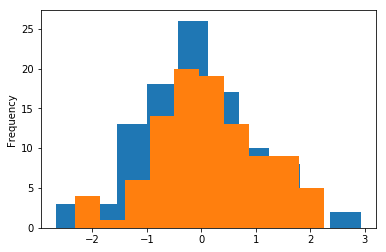

In [43]:
# Let's plot a histogram of values in column 1 grouped by the label

df[df['21']==0]['1'].plot.hist(bins=10)
df[df['21']==1]['1'].plot.hist(bins=10)
plt.show()

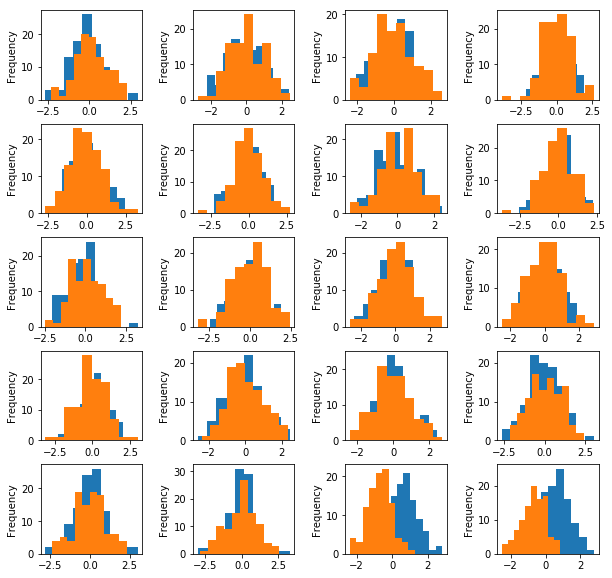

In [44]:
# It seems that feature 1 does not help to separate data according to labels.
# Let's see the same for all the features

plt.subplots(figsize=(10, 10))
plt.subplots_adjust(hspace=0.27,wspace=0.5)
for i in range(20):
    plt.subplot(5,4,0+i+1)
    df[df['21']==0][str(i+1)].plot.hist(bins=10)
    df[df['21']==1][str(i+1)].plot.hist(bins=10)
plt.show()

In [46]:
# Let's repeat the 10-fold Cross-validation with new data X2
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)


0.8299999999999998

In [51]:
# Let's find the 10-fold cross-validation with only 2 last columns

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2[:,18:],y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

0.9099999999999999

In [52]:
# Improvement in accuracy
# Unfortunately, we don't know before hand the relevant feature.

# Sklearn to the rescue!

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Select k best features following a given measure. Fit that on whole data set and return only relevant columns 
X_new = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)

# Let's do now the 10-fold cross-validation again
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

0.9049999999999999

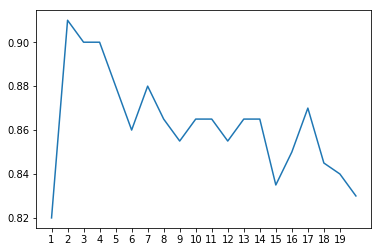

In [50]:
original = np.zeros(20)
for i in range(20):
    X_new = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X2, y)
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y, cv=cv, scoring='accuracy')  
    original[i]=np.mean(cv_scores)

plt.xticks(np.arange(0, 20, step=1))
plt.plot(range(1,21),original)
plt.show()

## 3- Let's find best parameters

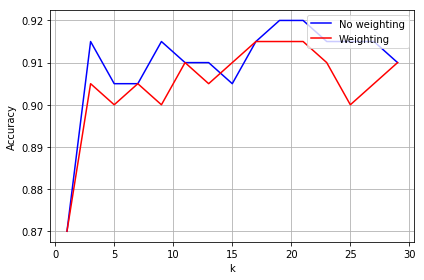

In [62]:
X_new = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [63]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_new, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 19, 'weights': 'uniform'} Accuracy= 0.92


## What about PCA for dimensionality reduction?

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)

In [65]:
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_pca, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 25, 'weights': 'uniform'} Accuracy= 0.835


In [67]:
# Not very good because does not consider labels in the reduction. Let's try LDA that is similar to PCA
# but takes into account labels

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X2, y).transform(X2)

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_lda, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 25, 'weights': 'uniform'} Accuracy= 0.925
